Тестовое задание
на  позицию «Игровой Аналитик Данных (gamedev)»



Компания: разработчик казуальных игр\
Исполнитель: Сасимович Игорь (i.sasimovich@yandex.ru, Telegram: http://t.me/ihar367)


# Вопрос № 4:   (SQL)

Есть 3 таблицы:
1. “Installs” - таблица, содержащая информацию об установках с полями:
* a.   `install_time timestamp
* b.   `client_type` varchar(50) 
* c.   `country_code`  varchar(255) 
* d.   `user_id` varchar(255) 

2. “Visits” - таблица с визитами:
* a. `id` int(10) 
* b. `user_id` varchar(255) 
* c. `time` timestamp
* d. `client_type` varchar(50)
* e. `ip` varchar(255) 

3. “Payments” - таблица с информацией о платежах:
* a. `id` int(10) 
* b. `user_id` varchar(255) 
* c. `transaction_time`  timestamp
* d. `product_id` varchar(255)
* e. `amount`  decimal(19,4)

Нужно написать SQL-запросы для расчета:
1. ARPU, ARPPU, Paying share, для пользователей, установивших 
приложение в последние 30 дней.
2. RR1, RR7 (классический).
3. Конверсию во 2-й платеж в течение 14 дней с момента установки для 
пользователей, установивших приложение в последние 30 дней.

Для выполнения задания я буду использовать sqlite3. 
На мой взгляд, выполнение тестовых заданий с использованием SQLite3 удобно по нескольким причинам:

1. Простота установки и использования.
Нет необходимости в установке и настройке сервера: SQLite3 не требует установки и настройки серверного ПО. Достаточно иметь установленный Python и модуль sqlite3, который входит в стандартную библиотеку Python.
2. Легковесность
3. Полная SQL-совместимость

Из минусов: собственный синтаксис для работы с датами и некоторые другие моменты, отличные от PostgreSQL и MySQL.

In [1]:
import pandas as pd
import numpy as np
import sqlite3

import random
from scipy.stats import expon, norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Создадим таблицы в sqlite3.

In [2]:
con = sqlite3.connect('db')
c = con.cursor()

In [3]:
def select(sql):
  return pd.read_sql(sql,con)

In [4]:
c.execute('''CREATE TABLE IF NOT EXISTS installs (
                                                    install_time TIMESTAMP,
                                                    client_type VARCHAR(50),
                                                    country_code VARCHAR(255),
                                                    user_id VARCHAR(255)
);
''')

c.execute('''CREATE TABLE IF NOT EXISTS visits (
                                                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                                                    user_id VARCHAR(255),
                                                    time TIMESTAMP,
                                                    client_type VARCHAR(50),
                                                    ip VARCHAR(255)
);
''')

c.execute('''CREATE TABLE IF NOT EXISTS payments (
                                                    id INTEGER PRIMARY KEY AUTOINCREMENT,
                                                    user_id VARCHAR(255),
                                                    transaction_time TIMESTAMP,
                                                    product_id VARCHAR(255),
                                                    amount DECIMAL(19, 4)
);
''')

In [5]:
c.execute('''INSERT INTO installs (install_time, client_type, country_code, user_id)
                        VALUES 
                                ('2024-06-01 10:00:00', 'iOS', 'US', 'user1'),
                                ('2024-06-15 12:30:00', 'Android', 'CA', 'user2'),
                                ('2024-06-25 14:45:00', 'iOS', 'UK', 'user3'),
                                ('2024-06-28 09:20:00', 'Android', 'IN', 'user4'),
                                ('2024-06-29 11:00:00', 'iOS', 'AU', 'user5');
''')

c.execute('''INSERT INTO visits (user_id, time, client_type, ip)
                        VALUES 
                                ('user1', '2024-06-02 10:00:00', 'iOS', '192.168.1.1'),
                                ('user2', '2024-06-16 12:30:00', 'Android', '192.168.1.2'),
                                ('user3', '2024-06-26 14:45:00', 'iOS', '192.168.1.3'),
                                ('user4', '2024-06-28 09:20:00', 'Android', '192.168.1.4'),
                                ('user5', '2024-06-29 11:00:00', 'iOS', '192.168.1.5');
''')

c.execute('''INSERT INTO payments (user_id, transaction_time, product_id, amount)
                        VALUES 
                                ('user1', '2024-06-02 11:00:00', 'product1', 10.00),
                                ('user2', '2024-06-17 13:30:00', 'product2', 15.00),
                                ('user3', '2024-06-27 15:45:00', 'product3', 20.00),
                                ('user4', '2024-06-29 10:20:00', 'product4', 5.00),
                                ('user5', '2024-06-30 12:00:00', 'product5', 25.00);
''')

In [6]:
sql1 = '''SELECT * FROM installs'''
select(sql1)

,install_time,client_type,country_code,user_id
0,2024-06-01 10:00:00,iOS,US,user1
1,2024-06-15 12:30:00,Android,CA,user2
2,2024-06-25 14:45:00,iOS,UK,user3
3,2024-06-28 09:20:00,Android,IN,user4
4,2024-06-29 11:00:00,iOS,AU,user5


In [7]:
sql2 = '''SELECT * FROM payments'''
select(sql2)

,id,user_id,transaction_time,product_id,amount
0,1,user1,2024-06-02 11:00:00,product1,10
1,2,user2,2024-06-17 13:30:00,product2,15
2,3,user3,2024-06-27 15:45:00,product3,20
3,4,user4,2024-06-29 10:20:00,product4,5
4,5,user5,2024-06-30 12:00:00,product5,25


In [8]:
sql3 = '''SELECT * FROM visits'''
select(sql3)

,id,user_id,time,client_type,ip
0,1,user1,2024-06-02 10:00:00,iOS,192.168.1.1
1,2,user2,2024-06-16 12:30:00,Android,192.168.1.2
2,3,user3,2024-06-26 14:45:00,iOS,192.168.1.3
3,4,user4,2024-06-28 09:20:00,Android,192.168.1.4
4,5,user5,2024-06-29 11:00:00,iOS,192.168.1.5


In [9]:
# ARPU, ARPPU, Paying share, для пользователей, установивших приложение в последние 30 дней.

sql4 = '''

SELECT
    COUNT(DISTINCT i.user_id) AS total_users,
    SUM(p.amount) AS total_revenue,
    CASE WHEN COUNT(DISTINCT i.user_id) > 0 THEN SUM(p.amount) / COUNT(DISTINCT i.user_id) ELSE 0 END AS arpu,
    COUNT(DISTINCT p.user_id) AS paying_users,
    CASE WHEN COUNT(DISTINCT p.user_id) > 0 THEN SUM(p.amount) / COUNT(DISTINCT p.user_id) ELSE 0 END AS arppu,
    CASE WHEN COUNT(DISTINCT i.user_id) > 0 THEN CAST(COUNT(DISTINCT p.user_id) AS FLOAT) / COUNT(DISTINCT i.user_id) ELSE 0.0 END AS paying_share
FROM installs i
LEFT JOIN payments p ON i.user_id = p.user_id
WHERE i.install_time >= datetime('now', '-30 days');

'''

select(sql4)

#  для PostgreSQL: datetime('now', '-30 days') заменить на NOW() - INTERVAL '30 days'
#  для MySQL и ClickHouse: NOW() - INTERVAL 30 DAY

,total_users,total_revenue,arpu,paying_users,arppu,paying_share
0,0,None,0,0,0,0.0


In [10]:
# RR1, RR7 (классический).


# 1ый вариант запроса (с подзапросом) 
# 1. Подзапрос user_activity: Получаем уникальное сочетание user_id, install_date, visit_date, days_since_install (количество дней от установки).
# 2. Расчитываем RR1, RR7 (классический)

sql5 = '''
SELECT
    install_date,
    SUM(CASE WHEN days_since_install = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(DISTINCT user_id) AS rr1,
    SUM(CASE WHEN days_since_install = 7 THEN 1 ELSE 0 END) * 100.0 / COUNT(DISTINCT user_id) AS rr7
FROM (
        SELECT
            i.user_id AS user_id,
            DATE(i.install_time) AS install_date,
            DATE(v.time) AS visit_date,
            CAST((julianday(v.time) - julianday(i.install_time)) AS INTEGER) AS days_since_install
        FROM Installs i
        LEFT JOIN Visits v ON i.user_id = v.user_id
        GROUP BY 1, 2, 3, 4 
    ) AS user_activity 
GROUP BY install_date
ORDER BY install_date;

'''


# 2ой вариант запроса с использованием CTE
sql6 = '''
WITH user_activity AS (
    SELECT
        i.user_id AS user_id,
        DATE(i.install_time) AS install_date,
        DATE(v.time) AS visit_date,
        CAST((julianday(v.time) - julianday(i.install_time)) AS INTEGER) AS days_since_install 
    FROM Installs i
    LEFT JOIN Visits v ON i.user_id = v.user_id
    GROUP BY i.user_id, install_date, visit_date
)

SELECT
    install_date,
    SUM(CASE WHEN days_since_install = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(DISTINCT user_id) AS rr1,
    SUM(CASE WHEN days_since_install = 7 THEN 1 ELSE 0 END) * 100.0 / COUNT(DISTINCT user_id) AS rr7
FROM user_activity
GROUP BY install_date
ORDER BY install_date;
'''

print(f'1ая версия запроса (с подзапросом):\n{select(sql5).head(3)}')
print('------------------')
print(f'2ой вариант запроса с использованием CTE:\n{select(sql6).head(3)}')

#  для PostgreSQL: CAST((v.time - i.install_time) AS INTEGER) AS days_since_install 
#  для MySQL: DATEDIFF(v.time, i.install_time) AS days_since_install
#  для ClickHouse: DATEDIFF('day', i.install_time, v.time) AS days_since_install

1ая версия запроса (с подзапросом):
  install_date    rr1  rr7
0   2024-06-01  100.0  0.0
1   2024-06-15  100.0  0.0
2   2024-06-25  100.0  0.0
------------------
2ой вариант запроса с использованием CTE:
  install_date    rr1  rr7
0   2024-06-01  100.0  0.0
1   2024-06-15  100.0  0.0
2   2024-06-25  100.0  0.0


In [11]:
# Конверсия во 2-й платеж в течение 14 дней с момента установки для пользователей, 
# установивших приложение в последние 30 дней.


# 1ый вариант запроса с использованием CTE ❌
# 1. Определим пользователей, которые установили приложение в последние 30 дней.
# 2. Найдём все платежи этих пользователей в течение 14 дней после установки.
# 3. Подсчитаем количество платежей для каждого пользователя в течение этого периода. Найдём пользователей,совершивших  второй платеж.
# 4. Подсчитаем общее количество установок и количество пользователей, совершивших второй платеж. 
#    Расчитаем необходимую конверсию.
sql6 = '''
WITH recent_installs AS (
    SELECT user_id, install_time
    FROM installs
    WHERE install_time >= DATE('now', '-30 days')
),
user_payments AS (
    SELECT
        p.user_id,
        p.transaction_time,
        p.amount,
        ri.install_time
    FROM payments p
    JOIN recent_installs ri ON p.user_id = ri.user_id
    WHERE p.transaction_time BETWEEN ri.install_time AND DATETIME(ri.install_time, '+14 days')
),
second_payment_users AS (
    SELECT
        user_id,
        COUNT(*) AS payment_count
    FROM user_payments
    GROUP BY user_id
    HAVING payment_count >= 2
)
SELECT
    (SELECT COUNT(*) FROM recent_installs) AS total_installs,
    (SELECT COUNT(*) FROM second_payment_users) AS users_with_second_payment,
    (SELECT COUNT(*) FROM second_payment_users) * 1.0 / (SELECT COUNT(*) FROM recent_installs) AS conversion_rate

'''

# 2ой вариант запроса. Попробуем оптимизировать данный запрос. ✅
# Объединим 2ое и 3ее CTE, в котором сразу найдём пользователей, совершивших 2 или более платежа в течение 14 дней после установки.

sql6 = '''
WITH recent_installs AS (
    SELECT user_id, install_time
    FROM installs
    WHERE install_time >= DATE('now', '-30 days')
),
users_with_payments  AS (
    SELECT
        p.user_id,
        COUNT(p.amount) AS payment_count
    FROM payments p
    JOIN recent_installs ri ON p.user_id = ri.user_id
    WHERE p.transaction_time BETWEEN ri.install_time AND DATETIME(ri.install_time, '+14 days')
    GROUP BY p.user_id
    HAVING COUNT(p.amount) >= 2 -- Используем COUNT, чтобы отслеживать 2 платежа
)

SELECT
    COUNT(ri.user_id) AS total_installs,
    COUNT(up.user_id) AS users_with_second_payment,
    COUNT(up.user_id) * 1.0 / COUNT(ri.user_id) AS conversion_rate
FROM recent_installs ri
LEFT JOIN users_with_payments AS up ON ri.user_id = up.user_id;

''' 

select(sql6)

,total_installs,users_with_second_payment,conversion_rate
0,0,0,None


# Вопрос № 5:   (Python)

Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными. DataFrame должен состоять из 1000 строк и 5 колонок.
Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:

* 1-я  колонка  –  user_id  –  идентификатор  пользователя.  Длина  user_id должна 
равняться  15-ти  символам.  Идентификатор  состоит  из случайной комбинации 
следующих символов: "1234567890abcdefghijk". Для каждой строки в DataFrame 
значение  user_id  формируются  случайным  образом.  Добавь  проверку  на 
уникальность сгенерированного user_id.

* 2-я  колонка  –  purchase_number  –  номер  покупки.  Столбец  необходимо 
заполнить случайными значениями в диапазоне от 1 до 10.

* 3-я  колонка  –  interval  –  время,  прошедшее  с  момента  предыдущей  покупки 
пользователя.  Столбец  необходимо  заполнить  случайными  значениями  из 
нормального распределения со средним 1440 и стандартным отклонением 200. 
Обрати внимание, что для первой покупки пользователей данное поле должно 
быть пустым (null), т.к. предыдущей покупки у пользователя не было.

* 4-я  колонка  –  amount  –  стоимость  покупки.  Значения  для  этого  столбца 
необходимо взять из экспоненциального распределения с параметром λ = 1.

* 5-я  колонка  –  retention  –  день  жизни  покупателя,  в  который  он  совершил 
покупку. Необходимо сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 
0.25, 0.2, 0.15 и 0.05 соответственно.

In [12]:
random.seed(42)

In [13]:
# Функция для генерации уникального user_id
def generate_unique_user_id(existing_ids):
    characters = "1234567890abcdefghijk"
    while True:
        user_id = ''.join(random.choices(characters, k=15))
        if user_id not in existing_ids:
            existing_ids.add(user_id)
            return user_id

In [14]:
# Генерируем user_id
existing_user_ids = set()
user_ids = [generate_unique_user_id(existing_user_ids) for _ in range(1000)]

In [15]:
# Генерируем purchase_number (от 1 до 10)
purchase_numbers = [random.randint(1, 10) for _ in range(1000)]

In [16]:
# Генерируем interval (нормальное распределение с параметрами)
intervals = np.random.normal(1440, 200, size=1000).astype(int)

In [17]:
# Генерируем amount (экспоненциальное распределение)
amounts = np.random.exponential(scale=1, size=1000)

In [18]:
# Генерируем retention (день жизни покупателя)
retention_values = [1, 2, 3, 4, 5]
retention_probabilities = [0.35, 0.25, 0.2, 0.15, 0.05]
retention = np.random.choice(retention_values, size=1000, p=retention_probabilities)

In [19]:
# Создаем DataFrame
data = {
    'user_id': user_ids,
    'purchase_number': purchase_numbers,
    'interval': intervals,
    'amount': amounts,
    'retention': retention
}

df = pd.DataFrame(data)

In [20]:
# Присвоение null для первой покупки пользователей 
df.loc[df['purchase_number'] == 1, 'interval'] = np.nan

In [21]:
df[df['purchase_number'] == 1].head()

# DataFrame готов ✅

,user_id,purchase_number,interval,amount,retention
12,fek398i640966j0,1,NaN,0.270939,2
14,6g09kkbf47kcbf2,1,NaN,0.287825,3
23,ik6d9kbj3k4k630,1,NaN,0.822243,1
42,kb635541b6kbe3i,1,NaN,0.642480,1
65,93j7a3i30efj9f4,1,NaN,0.645563,3


1. Вычисляем среднее значение интервала по каждой группе номеров покупок


In [22]:
df['mean_interval_by_purchase'] = df.groupby('purchase_number')['interval'].transform('mean')
df.head()

,user_id,purchase_number,interval,amount,retention,mean_interval_by_purchase
0,d165fei2915a15d,9,1306.0,0.092142,1,1448.587719
1,b5cg1ge84k823hc,4,1341.0,0.169745,4,1441.164948
2,gfbk8bhcice1572,9,1257.0,0.172391,1,1448.587719
3,536d8856jdc4f48,10,1310.0,3.668549,2,1430.869159
4,kdbehg51765ji7d,4,1306.0,0.937680,3,1441.164948


2.  Напиши функцию, которая принимает на вход значение user_id и возвращает 
строку  следующего  вида:  все  буквы  в той последовательности, в которой они 
встречаются в user_id, затем все цифры в user_id в той последовательности, в 
которой они встречаются в user_id.  Добавь результат применения этой функции 
к user_id в новый столбец.

In [23]:
# Функция для перестановки символов в заданной последовательности
def rearrange_characters(user_id):
    letters = ''.join([char for char in user_id if char.isalpha()])
    numbers = ''.join([char for char in user_id if char.isdigit()])
    return letters + numbers 

In [24]:
# Применяем функцию к столбцу user_id и добавляем результат в новый столбец
df['rearranged_user_id'] = df['user_id'].apply(rearrange_characters)
df.head()

,user_id,purchase_number,interval,amount,retention,mean_interval_by_purchase,rearranged_user_id
0,d165fei2915a15d,9,1306.0,0.092142,1,1448.587719,dfeiad165291515
1,b5cg1ge84k823hc,4,1341.0,0.169745,4,1441.164948,bcggekhc5184823
2,gfbk8bhcice1572,9,1257.0,0.172391,1,1448.587719,gfbkbhcice81572
3,536d8856jdc4f48,10,1310.0,3.668549,2,1430.869159,djdcf5368856448
4,kdbehg51765ji7d,4,1306.0,0.937680,3,1441.164948,kdbehgjid517657


3. Вычисли  моду,  медиану,  среднее,  дисперсию  и  стандартное  отклонение  для 
столбцов  interval,  amount  и  retention.  

Построй  гистограммы  распределения 
значений в столбцах.

In [25]:
statistics = df.agg({
    'interval': ['median', 'mean', 'var', 'std'],
    'amount': ['median', 'mean', 'var', 'std'],
    'retention': ['median', 'mean', 'var', 'std']
})
statistics 

,interval,amount,retention
median,1438.000000,0.677312,2.000000
mean,1440.694934,0.970153,2.312000
var,40509.499996,0.928942,1.516172
std,201.269720,0.963816,1.231329


In [26]:
df.describe()

,purchase_number,interval,amount,retention,mean_interval_by_purchase
count,1000.000000,908.000000,1000.000000,1000.000000,908.000000
mean,5.554000,1440.694934,0.970153,2.312000,1440.694934
std,2.915405,201.269720,0.963816,1.231329,16.188095
min,1.000000,741.000000,0.002060,1.000000,1407.844156
25%,3.000000,1310.000000,0.298313,1.000000,1430.869159
50%,6.000000,1438.000000,0.677312,2.000000,1441.164948
75%,8.000000,1579.250000,1.291414,3.000000,1449.737374
max,10.000000,2213.000000,6.686061,5.000000,1466.744681


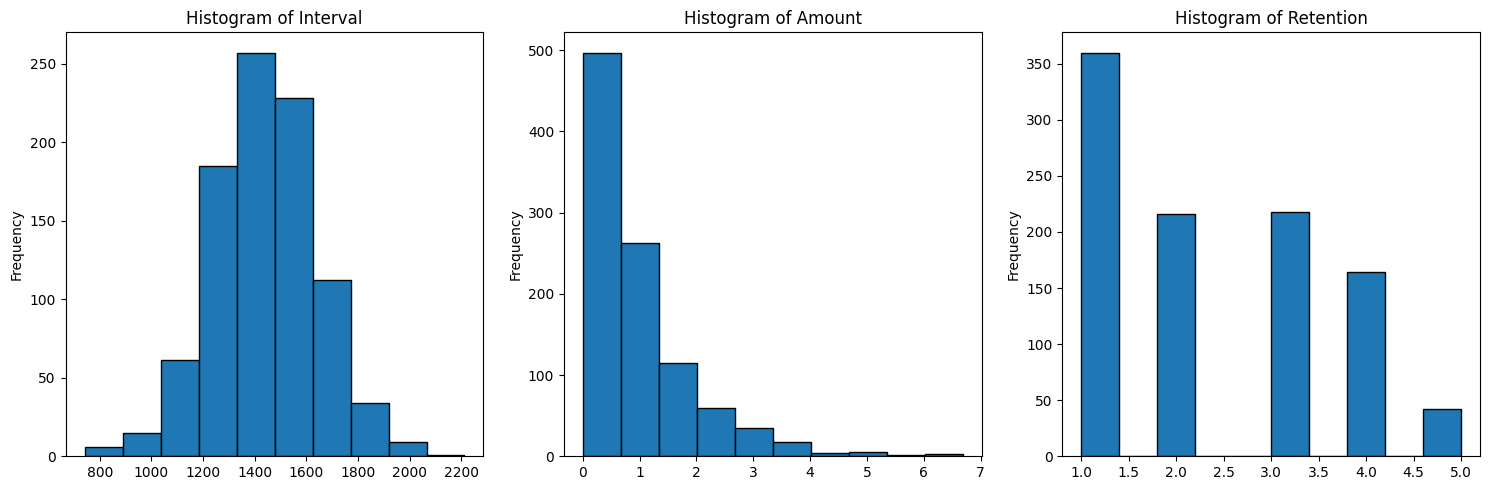

In [27]:
# Построение гистограмм распределения значений
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

df['interval'].plot.hist(ax=axes[0], bins=10, edgecolor='black')
axes[0].set_title('Histogram of Interval')

df['amount'].plot.hist(ax=axes[1], bins=10, edgecolor='black')
axes[1].set_title('Histogram of Amount')

df['retention'].plot.hist(ax=axes[2], bins=10, edgecolor='black')
axes[2].set_title('Histogram of Retention')

plt.tight_layout()
plt.show()


3. Построй  график,  который  наиболее  полно,  на  твой  взгляд,  описывает 
зависимость интервала между покупками и номера покупки. Обоснуй, почему ты 
так считаешь?

На мой взгляд, в ситуации, когда у нас одна переменная количественная, а вторая категориальная, наиболее подходящим типом графика является box plot ("ящик с усами"). 
Box plot наглядно показывает, как распределяются значения числовой переменной (интервалы между покупками) в зависимости от категориальной переменной (номер покупки). Ящик с усами предоставляет возможность видеть не только среднее, но и диапазон интервалов, что может помочь выявить тенденции, например, увеличиваются ли интервалы с увеличением номера покупки или наоборот. С его помощью легко сравнить интервалы между покупками для различных номеров покупок и выявить различия или закономерности.
Ещё Box plot помогает выявить аномальные значения (выбросы) в данных для каждой категории.





Text(0, 0.5, 'Интервал между покупками')

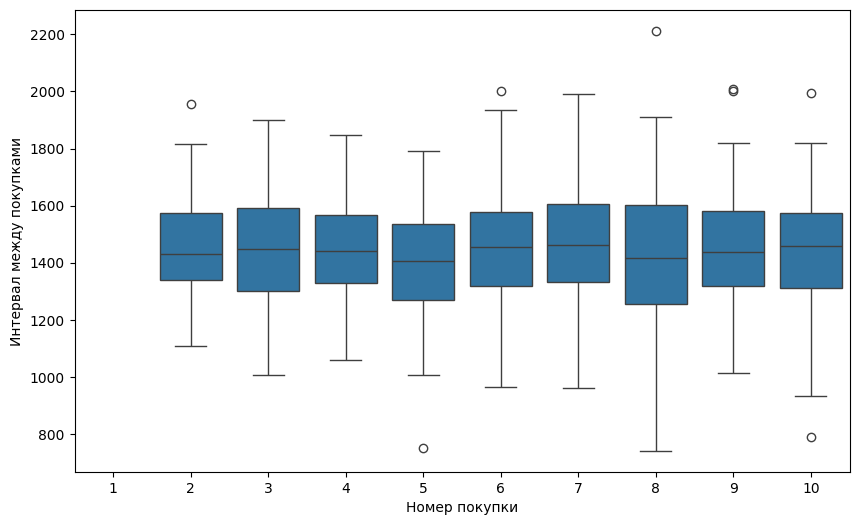

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='purchase_number',y='interval',data=df)
plt.xlabel('Номер покупки')
plt.ylabel('Интервал между покупками')

Как видно из box plot различия значений интервалов между разными категориями purchase_number выражены неярко и распределение интервалов кажется примерно равномерным, что  может говорить о том, что в данных отсутствуют значительные различия в интервалах между покупками в зависимости от номера покупки. Возможно, это свидетельствует о том, что пользователи совершают покупки примерно с одинаковыми интервалами независимо от их номера.  *Это говорит о слабой или отсутствующей зависимости интервала между покупками от номера покупки. Проще говоря, номер покупки (будь то первая, вторая, третья и так далее) не сильно влияет на интервал между покупками.*